# CREDIT SCORE ANALYSIS MODEL FOR KENYAN SACCOS 

- Industry: Financial Services, specifically the SACCO industry in Kenya.
- Business Problem: SACCOs play a crucial role in providing financial services to their members, including loans. Assessing the creditworthiness of SACCO members is vital to making sound lending decisions and managing the risk associated with loan portfolios.

## BUSINESS OBJECTIVE
The primary objectives of this project within the SACCO industry in Kenya are as follows:

- Credit Scoring Model: Develop a predictive model tailored to SACCOs that accurately assesses the creditworthiness of their members based on demographic and financial attributes.

- Risk Management: Improve the ability of SACCOs to manage loan portfolios effectively by identifying and mitigating the risk of default among members.

- Operational Efficiency: Streamline the credit assessment process for SACCOs, making it more efficient and data-driven.

## Potential Business Impact
The successful completion of this project is expected to deliver several significant business benefits to SACCOs in Kenya:

- Risk Mitigation: A robust credit scoring model will enable SACCOs to reduce the risk of lending to individuals with a higher likelihood of default, enhancing the overall financial stability of the SACCO.

- Improved Lending: SACCOs will be able to make more informed lending decisions, leading to better loan portfolio performance and profitability.

- Member Engagement: Providing fair and transparent credit assessments can improve trust and engagement among SACCO members, potentially attracting more members and deposits.

- Regulatory Compliance: Compliance with regulatory requirements, such as the SASRA (Sacco Societies Regulatory Authority) guidelines in Kenya, is essential for the SACCO industry, and an accurate credit scoring model can aid in achieving compliance.

## Stakeholders
Key stakeholders involved in this project within the SACCO industry in Kenya include:

- SACCOs: These are the primary users of the credit scoring model, including large SACCOs, small community-based SACCOs, and other SACCO institutions in Kenya.

- SASRA and Regulatory Authorities: Government agencies, including SASRA, responsible for overseeing and regulating the SACCO industry in Kenya.

- SACCO Members: Individuals who are members of SACCOs and are seeking loans or other financial services.

- Data Analysts: The team responsible for developing and maintaining the credit scoring model, often working in collaboration with SACCOs and regulatory authorities.

# DATA UNDERSTANDING 

The dataset containing information about SACCO members' attributes and credit scores will be used to train and evaluate the credit scoring model. The model will leverage this data to make predictions regarding the creditworthiness of SACCO members, facilitating more informed lending decisions.

This dataset contains information about a sample of over 100 people across the world. The data includes the following information:

- Age
- Gender
- Income
- Education
- Marital Status
- Number of Children
- Home Ownership
- Credit Score

# DATA PREPROCESSING

### Imports 

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Load the dataset 

In [52]:
data = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\CREDIT SCORE API\Credit Score Classification Dataset.csv")
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


Check for missing values

In [53]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values and their respective counts
print("Columns with Missing Values:")
for column, count in missing_values.items():
    if count > 0:
        print(f"{column}: {count} missing values")

Columns with Missing Values:


No missing values in the data so its clean

Hot-encoding to fit the data 

In [54]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=["Gender", "Education", "Marital Status", "Home Ownership"], drop_first=True)

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=["Credit Score"])
y = data_encoded["Credit Score"]

Spliting the data 

In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELING

Using simple linear regression model to see the outcome.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train_encoded)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error

# Encode the test target variable using label encoding
y_test_encoded = label_encoder.transform(y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.28088010823610005


MSE measures the average squared difference between the model's predictions and the actual values.
Lower MSE values are generally better, indicating better model performance.

The R-squared score measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). It provides insight into how well your model explains the variability in the data. Higher R2 values (closer to 1) indicate better model fit.

In [59]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test_encoded, y_pred)

print(f"R-squared (R2): {r2}")


R-squared (R2): 0.07309564282086978


Given the relatively low R2 score, you may want to explore other regression techniques.

Modeling using Random forest regression model

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train_encoded)

RandomForestRegressor(random_state=42)

In [61]:
# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for Random Forest model
mse_rf = mean_squared_error(y_test_encoded, y_pred_rf)
r2_rf = r2_score(y_test_encoded, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")

Random Forest Mean Squared Error (MSE): 0.029709090909090914
Random Forest R-squared (R2): 0.90196


A higher R2 score (closer to 1) indicates that the model explains a significant portion of the variability in the data. An R2 score of 0.90196 suggests that the Random Forest model provides a good fit to the data and can make accurate predictions.

# EXPLORATORY DATA ANALYSIS 

Scatter plots can help you assess how closely your predicted values align with the actual data points.

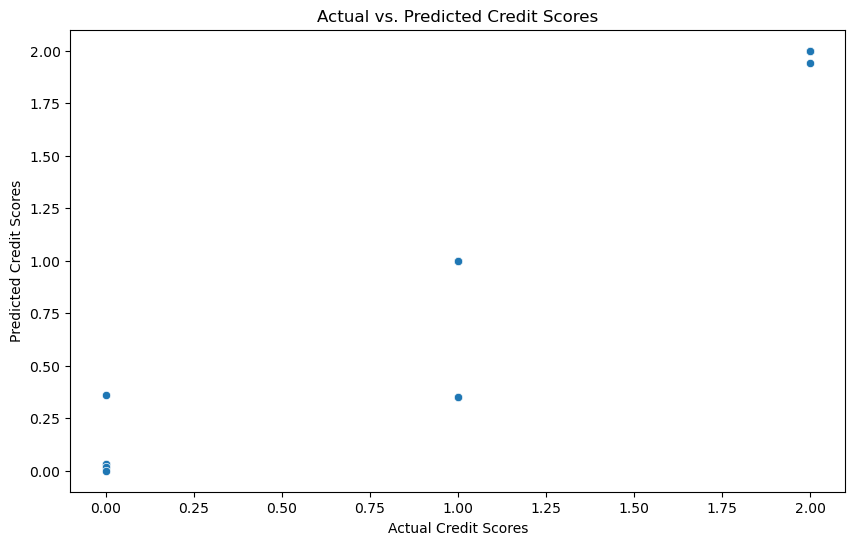

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_encoded, y=y_pred_rf)
plt.xlabel("Actual Credit Scores")
plt.ylabel("Predicted Credit Scores")
plt.title("Actual vs. Predicted Credit Scores")
plt.show()

Residual Plots can help you identify patterns or anomalies in the model's errors.

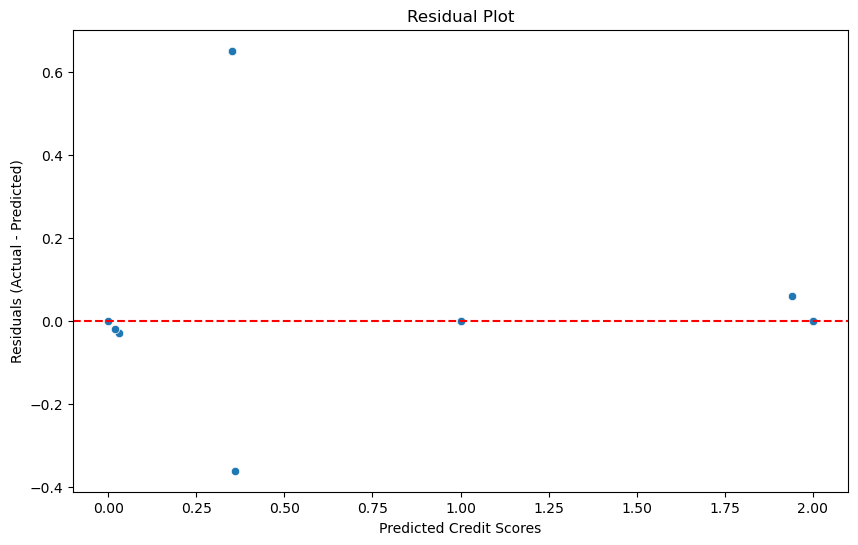

In [63]:
# Calculate residuals (the differences between actual and predicted values)
residuals = y_test_encoded - y_pred_rf

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel("Predicted Credit Scores")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

Model interpretation using feature importance to visualize what feature has the most weight in terms of dertimining the best way to reward a loan.

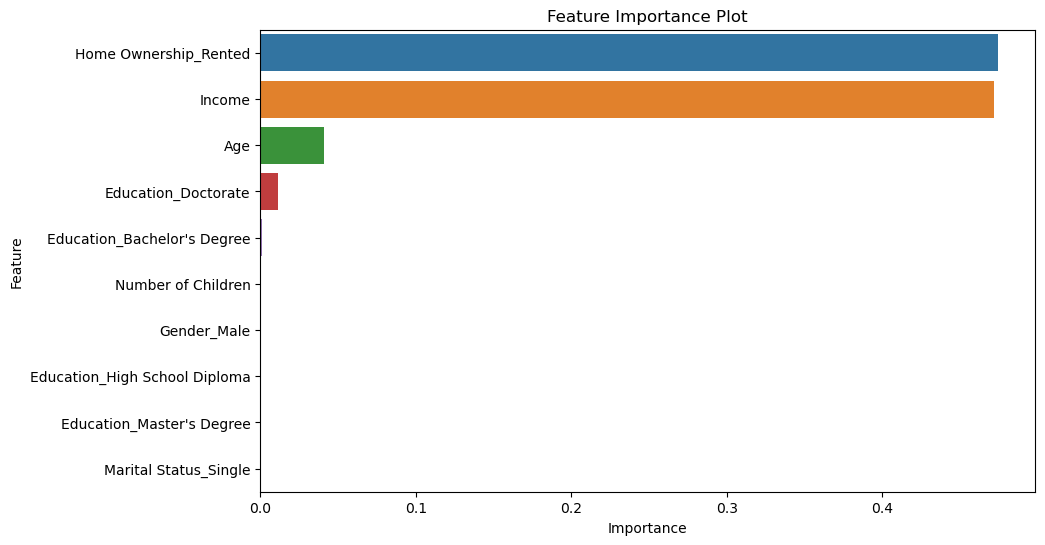

In [64]:
# Get feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

As shown the most important feature in determining is Home ownership which indicates the wealth of the individual is more stable if they own a home hence likely to get a loan.

Cross validations to figure out the stability of the data

In [69]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5  

# Initialize a K-Fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate the mean and standard deviation of scores
cross_val_scores = cross_val_score(random_forest_model, X_train, y_train_encoded, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cross_val_scores = -cross_val_scores

# Calculate the mean and standard deviation of MSE scores
mean_mse = cross_val_scores.mean()
std_mse = cross_val_scores.std()

# Print the cross-validation results
print(f"Cross-Validation MSE Scores: {cross_val_scores}")
print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation MSE: {std_mse}")


Cross-Validation MSE Scores: [0.07595556 0.00581923 0.0023     0.00065385 0.17472692]
Mean MSE: 0.05189111111111111
Standard Deviation MSE: 0.06763858065851493


The mean MSE of approximately 0.0519 indicates that, on average, your Random Forest Regression model has relatively low prediction errors when assessed through cross-validation. This is a positive sign and suggests that the model is doing a reasonably good job of predicting credit scores.

The standard deviation of approximately 0.0676 indicates some variability in the model's performance across different folds. While the mean MSE is low, the standard deviation suggests that there is some variation in prediction quality when different subsets of data are used for testing. This could be due to the inherent variability in the data or the model's sensitivity to different subsets.

## Hyperparameter Tuning using GridsearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


These hyperparameters indicate that your model can build deep trees with no maximum depth limit and split internal nodes with as few as 2 samples. Moreover, you're using a substantial number of estimators (300) to make predictions, which can improve the overall model's accuracy and generalization.